### Non-Local Means Comparison

The purpose of this notebook is to create a baseline similarity comparison between the low-level intensity images using non-local means image processing algorithm with the high intensity cell images.

In [27]:
import numpy as np
import skimage 
import matplotlib.pyplot as plt
from scipy.stats import entropy
from skimage import data, img_as_float, img_as_ubyte, io
from skimage.measure import compare_ssim as ssim
from skimage.morphology import disk
from skimage.restoration import denoise_nl_means, estimate_sigma
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/gpfs/share/skynet/apps/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['entropy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
path_to_data = '/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined1.ome.tif'
imsk = io.imread(path_to_data)
imsk.shape

/gpfs/share/skynet/apps/anaconda3/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:1752: UserWarning: ome-xml: not an ome-tiff master file
  warnings.warn("ome-xml: not an ome-tiff master file")


(700, 512, 512)

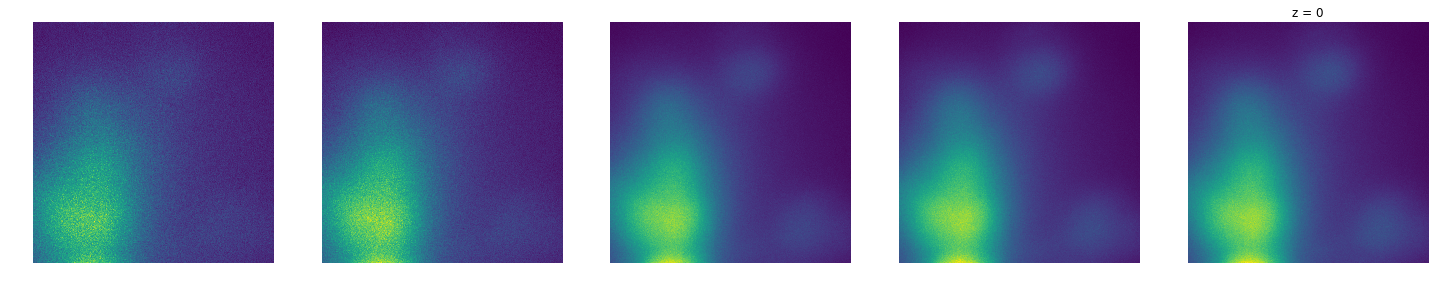

In [13]:
# for i in range(0,20,10):
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(25,5))
ax[0].imshow(imsk[0,:,:]);
ax[0].axis('off')
ax[1].imshow(imsk[1,:,:]);
ax[1].axis('off')
ax[2].imshow(imsk[3,:,:]);
ax[2].axis('off')
ax[3].imshow(imsk[4,:,:]);
ax[3].axis('off')
ax[4].imshow(imsk[5,:,:]);
ax[4].axis('off')
plt.title('z = '+str(i))
plt.show()

In [17]:
print(ssim(imsk[0,:,:],imsk[5,:,:]))
print(ssim(imsk[1,:,:],imsk[5,:,:]))
print(ssim(imsk[2,:,:],imsk[5,:,:]))
print(ssim(imsk[3,:,:],imsk[5,:,:]))
print(ssim(imsk[4,:,:],imsk[5,:,:]))

0.31686576701666386
0.37841418886241796
0.8011575386914539
0.9531394231374606
0.981593612984138
1.0


In [19]:
imsk_nl = []
imsk_nl.append(denoise_nl_means(imsk[0,:,:]))

/gpfs/share/skynet/apps/anaconda3/lib/python3.6/site-packages/skimage/restoration/non_local_means.py:108: UserWarning: denoise_nl_means will default to multichannel=False in v0.15
  warn('denoise_nl_means will default to multichannel=False in v0.15')


TypeError: list indices must be integers or slices, not tuple

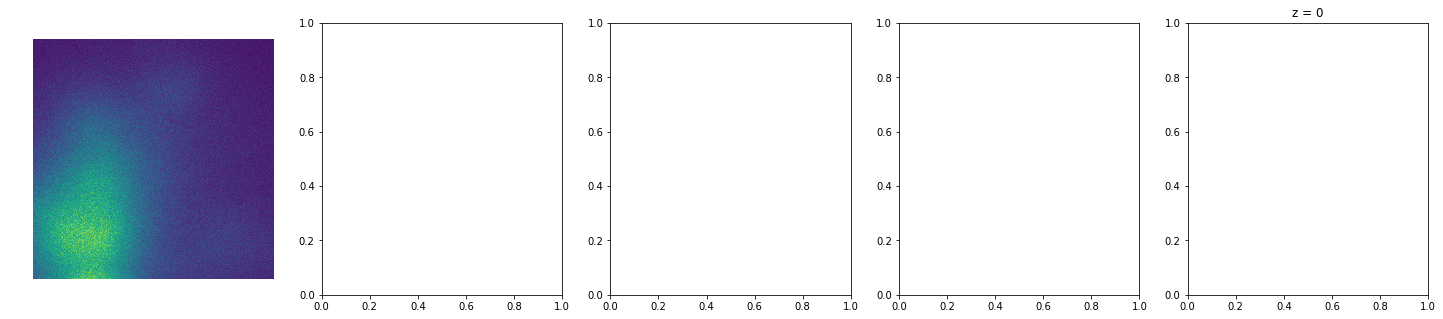

[[201. 149. 205. ... 217. 178. 149.]
 [191. 195. 222. ... 153. 187. 192.]
 [161. 166. 258. ... 182. 211. 188.]
 ...
 [652. 579. 520. ... 254. 281. 223.]
 [549. 575. 522. ... 233. 254. 246.]
 [507. 469. 494. ... 232. 280. 278.]]
(512, 512)


ValueError: Images of type float must be between -1 and 1.

In [29]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(25,5))
ax[0].imshow(imsk_nl[0]);
ax[0].axis('off')
plt.title('z = '+str(i))
plt.show()
print(imsk_nl[0])
print(imsk_nl[0].shape)
print(ssim(img_as_ubyte(imsk_nl[0]),img_as_ubyte(imsk[5,:,:])))